### Load the Stroke Prediction Data

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data file
# Sources of data: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
stroke = pd.read_csv('../Dataset/healthcare-dataset-stroke-data.csv')

In [3]:
# Head of the data
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Wrangling
We see that there is missing value in the bmi column. Let's check if there are more columns with missing values.

In [4]:
# Summary of the data
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Looks like the bmi column is the only column having missing values.  Let's see how much data is missing.

In [5]:
missing_count = stroke['bmi'].isnull().sum()
missing_percent = stroke['bmi'].isnull().mean() * 100
print('There are %d missing values. It is about %.2f%% of the BMI data which is acceptable.' % (missing_count, missing_percent))

There are 201 missing values. It is about 3.93% of the BMI data which is acceptable.


#### Handle missing data

Let's take a look at the distribution of the BMI data against age and group by gender.

<AxesSubplot:xlabel='age', ylabel='bmi'>

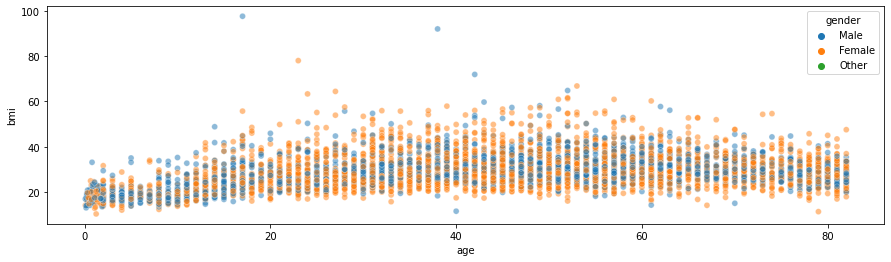

In [6]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x='age', y='bmi', data=stroke, hue='gender', alpha=0.5, ax=ax)

In [7]:
stroke['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

We see there are some outliners between the age range of about 17 to 43.  Since the median will not be affected by the outliners, we choose to fill the missing values with the median.

In [8]:
stroke['bmi'].fillna(stroke['bmi'].median(), inplace=True)

In [9]:
# Check the dataset again
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Dropping irrelevant column
The identification numbers of the patients are irrelevant to our analysis. We will drop this column.

In [10]:
stroke.drop('id', axis='columns', inplace=True)
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Exploratory Data Analysis

*stroke* is our target parameter.  Let's take a look at the relationships between the target parameter and the categorical parameters.

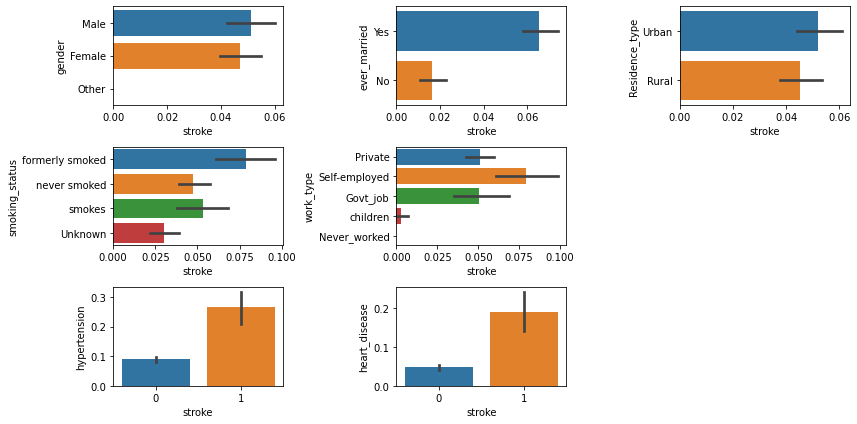

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(12, 6))
fig.delaxes(axes[1,2])
fig.delaxes(axes[2,2])

sns.barplot(x='stroke', y='gender', data=stroke, ax=axes[0,0])
sns.barplot(x='stroke', y='ever_married', data=stroke, ax=axes[0,1])
sns.barplot(x='stroke', y='Residence_type', data=stroke, ax=axes[0,2])
sns.barplot(x='stroke', y='smoking_status', data=stroke, ax=axes[1,0])
sns.barplot(x='stroke', y='work_type', data=stroke, ax=axes[1,1])
sns.barplot(x='stroke', y='hypertension', data=stroke, ax=axes[2,0])
sns.barplot(x='stroke', y='heart_disease', data=stroke, ax=axes[2,1])

plt.tight_layout()
plt.show()

From the above plots, male and female seem to have about the same chance getting a stroke.  On the other hand, if a patient has hypertension or heart disease may increase the risk of having a stroke.  We can also further analyze whether the smoking status, work type and if the patient ever married will contribute to the risk of having a stroke.

Now, let's take a look at the three numerical parameters.

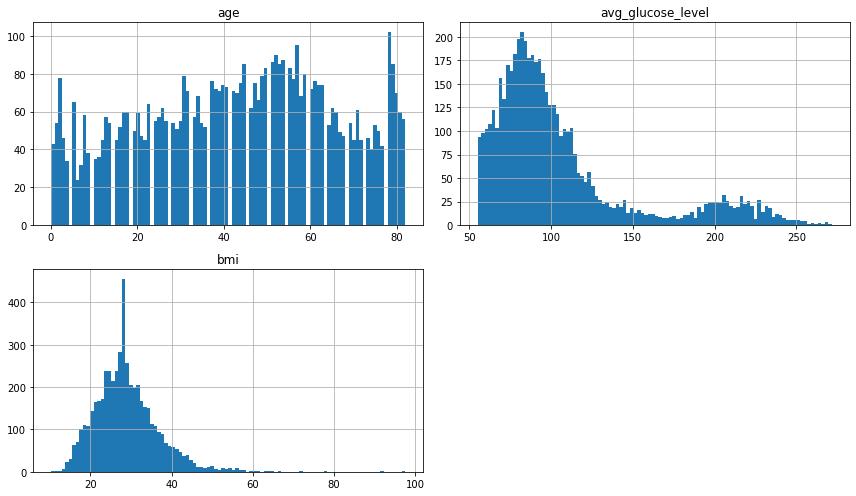

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
fig.delaxes(axes[1,1])

stroke.hist(column='age', bins=100, ax=axes[0,0])
stroke.hist(column='avg_glucose_level', bins=100, ax=axes[0,1])
stroke.hist(column='bmi', bins=100, ax=axes[1,0])

plt.tight_layout()
plt.show()

Next, we can generate a heatmap to see the correlation between parameters.  Before generating the heatmap, we need to convert the catergorical parameters to numerical.

In [13]:
cat_nums = {'gender': {'Male': 0, 'Female': 1, 'Other':2},
            'ever_married': {'Yes': 0, 'No': 1},
            'Residence_type': {'Urban':0, 'Rural':1},
            'smoking_status': {'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3},
            'work_type': {'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4},}
stroke = stroke.replace(cat_nums)

<AxesSubplot:>

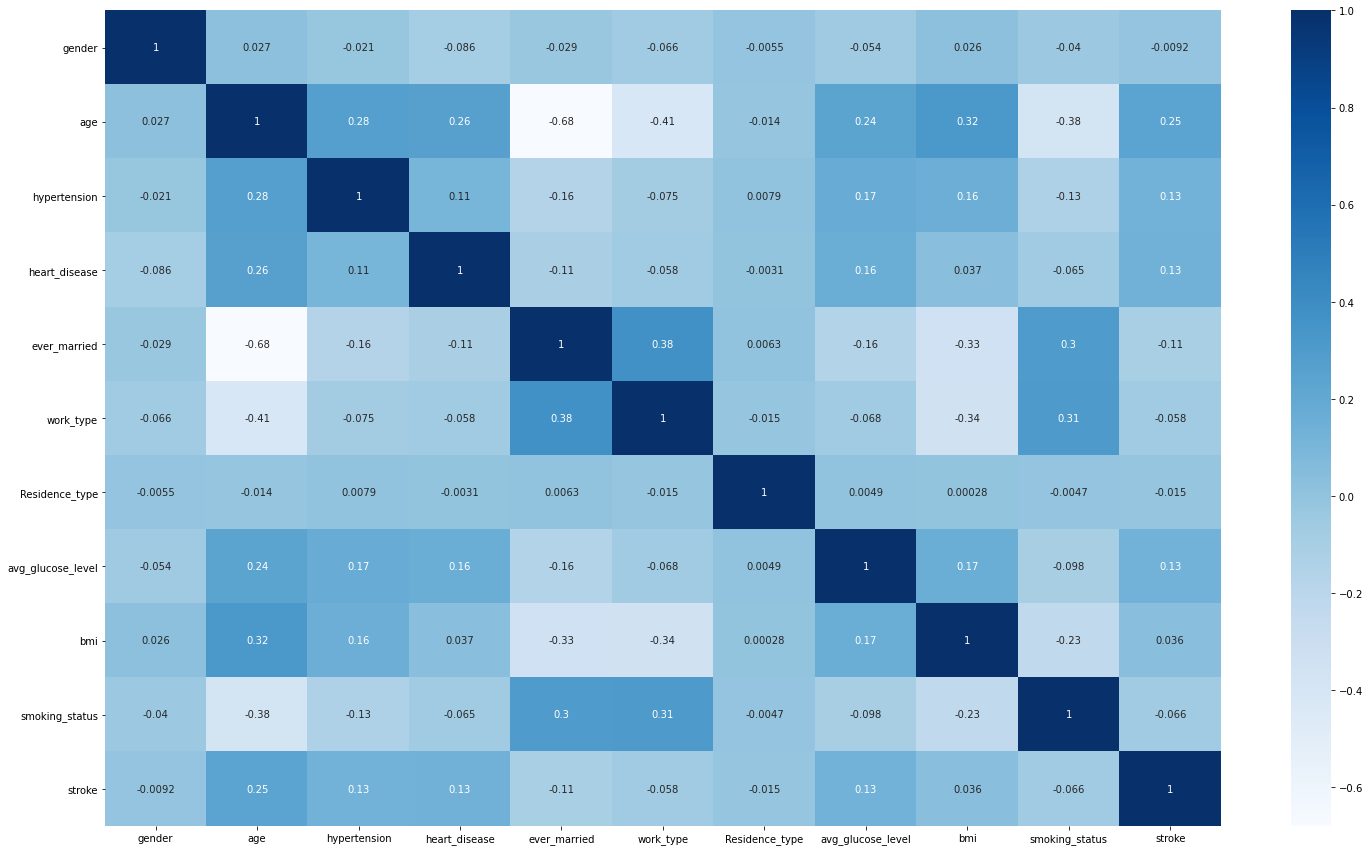

In [14]:
plt.figure(figsize=(25,15))
sns.heatmap(stroke.corr(), cmap="Blues", annot=True)

We see that *age* has the strongest correlation with *stroke* follow by *hypertension, heart disease* and *average glucose level.*